<a href="https://colab.research.google.com/github/yesjuhee/SKKU-DataAnalysisFoundation-SoundClassificationModel/blob/main/Data_Analysis_Project_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path_to_archive = '/content/drive/MyDrive/Colab Notebooks/Data Analysis project/archive/' #archive 파일 까지의 경로
path_to_audiofiles = path_to_archive+'recordings/recordings/'                             #오디오 파일 까지의 경로

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#0. Load and check data

In [ ]:
df = pd.read_csv(path_to_archive+'speakers_all.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2172 non-null   float64
 1   age_onset        2172 non-null   float64
 2   birthplace       2168 non-null   object 
 3   filename         2172 non-null   object 
 4   native_language  2172 non-null   object 
 5   sex              2172 non-null   object 
 6   speakerid        2172 non-null   int64  
 7   country          2167 non-null   object 
 8   file_missing?    2172 non-null   bool   
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      1 non-null      object 
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 188.9+ KB


In [ ]:
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


- 12개의 특성과 2172개의 데이터
- 필요한 특성?
  - sex : label로 이용
  - filename : 실제 audio 파일을 이용할 때 필요
  - file_missing? : 결측치를 찾는 용도로 필요..? 




# 1. Null data check

In [ ]:
df.columns

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [ ]:
for col in df.columns:
  null_pct = 100 * (df[col].isnull().sum() / df[col].shape[0])
  print(f"column: {col:>10}\t Percent of Nan value: {null_pct:.2f}%")

column:        age	 Percent of Nan value: 0.00%
column:  age_onset	 Percent of Nan value: 0.00%
column: birthplace	 Percent of Nan value: 0.18%
column:   filename	 Percent of Nan value: 0.00%
column: native_language	 Percent of Nan value: 0.00%
column:        sex	 Percent of Nan value: 0.00%
column:  speakerid	 Percent of Nan value: 0.00%
column:    country	 Percent of Nan value: 0.23%
column: file_missing?	 Percent of Nan value: 0.00%
column: Unnamed: 9	 Percent of Nan value: 100.00%
column: Unnamed: 10	 Percent of Nan value: 100.00%
column: Unnamed: 11	 Percent of Nan value: 99.95%


- birthplace와 country에 약간의 null data가 있지만 데이터분석에는 크게 없을 것으로 보임
- Unnamed column은 사용이 어려워 보임

# 2. Exploratory data analysis

## 2.1 Check sex

- sex는 target label로 쓰이기 때문에 표본의 분포가 적절한지 확인이 필요함
- pie plot 이용

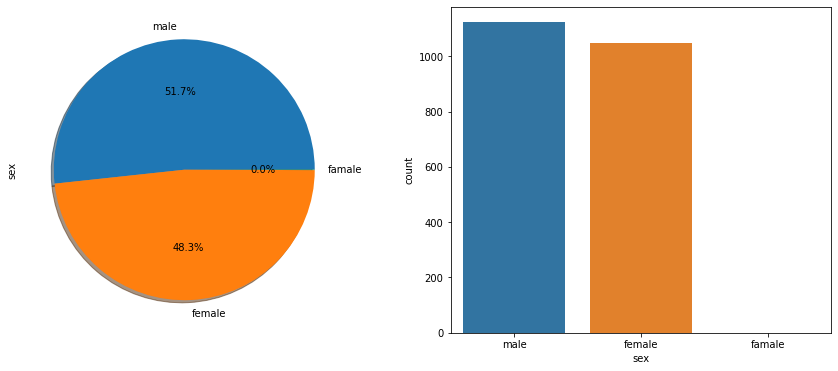

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

df['sex'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True)
sns.countplot('sex', data=df, ax=ax[1])

- 분포는 준수
- 이상치 famale 확인 -> 이후에 수정

In [ ]:
df['sex'].value_counts()

male      1123
female    1048
famale       1
Name: sex, dtype: int64

## 2.2 Check file_missing?

False    2140
True       32
Name: file_missing?, dtype: int64

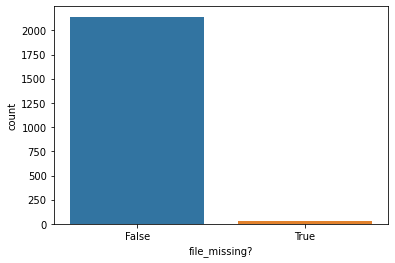

In [ ]:
sns.countplot('file_missing?', data=df)
df['file_missing?'].value_counts()

- file missing이 표시된 샘플은 32개
- 실제 오디오 파일을 확인해 본 결과 2138개로 메타데이터의 샘플 수 보다 34개가 적음
- file missing이 TRUE인 샘플 32개 + 2개의 파일이 손실된 것으로 파악됨

# 3. Feature engineering

## 3.1 Meta data

### Drop columns

In [ ]:
df.info()
'''
3 filename
5 sex
8 file_missing?
위 세개의 특성만 남기고 drop
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2172 non-null   float64
 1   age_onset        2172 non-null   float64
 2   birthplace       2168 non-null   object 
 3   filename         2172 non-null   object 
 4   native_language  2172 non-null   object 
 5   sex              2172 non-null   object 
 6   speakerid        2172 non-null   int64  
 7   country          2167 non-null   object 
 8   file_missing?    2172 non-null   bool   
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      1 non-null      object 
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 188.9+ KB


'\n3 filename\n5 sex\n8 file_missing?\n위 세개의 특성만 남기고 drop\n'

In [ ]:
df.drop(['age', 'age_onset', 'birthplace', 'native_language', 'speakerid', 'country', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1, inplace=True)
df.head()

,filename,sex,file_missing?
0,balanta,male,True
1,cameroon,male,True
2,fulfulde,male,True
3,haitian,male,True
4,haitian,male,True


### Check audio file missing

In [ ]:
print(f'number of {"samples":<20} : {df.shape[0]:}')
print(f'number of {"file_missing?":<20} : {df["file_missing?"].sum()}')
num_audio = len([name for name in os.listdir(path_to_audiofiles)])
print(f'number of {"audio files:":<20} : {num_audio}')
print(f'number of {"missing audio files":<20} : {df.shape[0]-num_audio}')

number of samples              : 2172
number of file_missing?        : 32
number of audio files:         : 2138
number of missing audio files  : 34


- file_missing? 에 표시된 32개 외에 추가 2개의 오디오 파일 결측이 있음

In [ ]:
#1. file_missing?이 True인 row -> drop
df.drop(df[df['file_missing?']==True].index, inplace=True)
df.shape

(2140, 3)

In [ ]:
#2. 해당 이름이 오디오 파일로 존재하지 않는 row -> drop
for index, row in df.iterrows():
  if os.path.isfile(path_to_audiofiles+row['filename']+'.mp3')==False:
    df.drop([index], inplace=True)
df.shape

(2138, 3)

In [ ]:
df.drop('file_missing?', axis=1, inplace=True)
df.head()

,filename,sex
32,afrikaans1,female
33,afrikaans2,male
34,afrikaans3,male
35,afrikaans4,male
36,afrikaans5,male


### fix typos / one-hot encoding

In [ ]:
df['sex'].unique()

array(['female', 'male', 'famale'], dtype=object)

In [ ]:
df['sex'] = df['sex'].map({'female':0, 'male':1, 'famale':0})

In [ ]:
df['sex'].unique()

array([0, 1])

In [ ]:
df.head()

,filename,sex
32,afrikaans1,0
33,afrikaans2,1
34,afrikaans3,1
35,afrikaans4,1
36,afrikaans5,1


## 3.2 Audio data

### Extracting audio features

In [ ]:
from pathlib import Path
import librosa
import librosa.display

def feature_engineering(path, data):
  count = 0
  new_df = pd.DataFrame()
  tmp={} #new_df의 row를 작성하는 역할
  
  for index, row in data.iterrows():
    tmp['filename']=row['filename']
    tmp['sex']=row['sex']
    y, sr=librosa.load(os.path.join(os.path.abspath(path),row['filename']+'.mp3'))  #audio 데이터 불러오기
    tmp['rms']=np.mean(librosa.feature.rms(y=y))                            
    tmp['chroma_stft']=np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    tmp['spec_cent']=np.mean(librosa.feature.spectral_centroid(y=y,sr=sr))
    tmp['spec_bw']=np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    tmp['rolloff']=np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr))
    tmp['zcr']=np.mean(librosa.feature.zero_crossing_rate(y))
    mfcc=librosa.feature.mfcc(y=y, sr=sr)
    i=0
    for e in mfcc: 
      tmp['mfcc'+str(i)]=np.mean(e)
      i+=1
    new_df = new_df.append([tmp])
    print(f'{count:>5} : {tmp["filename"]}')
    count+=1
  return new_df

In [ ]:
df = feature_engineering(path_to_audiofiles, df)

    0 : afrikaans1
    1 : afrikaans2
    2 : afrikaans3
    3 : afrikaans4
    4 : afrikaans5
    5 : agni1
    6 : akan1
    7 : albanian1
    8 : albanian2
    9 : albanian3
   10 : albanian4
   11 : albanian5
   12 : albanian6
   13 : albanian7
   14 : albanian8
   15 : albanian9
   16 : amazigh1
   17 : amazigh2
   18 : amharic1
   19 : amharic10
   20 : amharic11
   21 : amharic12
   22 : amharic13
   23 : amharic14
   24 : amharic15
   25 : amharic16
   26 : amharic17
   27 : amharic18
   28 : amharic19
   29 : amharic2
   30 : amharic20
   31 : amharic3
   32 : amharic4
   33 : amharic5
   34 : amharic6
   35 : amharic7
   36 : amharic8
   37 : amharic9
   38 : arabic1
   39 : arabic10
   40 : arabic100
   41 : arabic101
   42 : arabic102
   43 : arabic11
   44 : arabic12
   45 : arabic13
   46 : arabic14
   47 : arabic15
   48 : arabic16
   49 : arabic17
   50 : arabic18
   51 : arabic19
   52 : arabic2
   53 : arabic20
   54 : arabic21
   55 : arabic22
   56 : arabic23
   57 

In [ ]:
df.to_csv('processed_metadata.csv')

In [ ]:
df.head()

,filename,sex,rms,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,afrikaans1,0,0.105236,0.337591,1791.899574,1986.504642,3513.328551,0.087675,-281.021149,99.561287,...,-5.449433,-2.433016,-11.872358,-1.905546,-7.508106,-4.115567,-5.600014,-4.104479,-3.075781,-3.967186
0,afrikaans2,1,0.066085,0.425876,2378.830949,2203.935060,4448.085999,0.124309,-248.190552,93.372833,...,-14.747134,-0.825433,-7.357940,-6.245764,-0.913211,1.736603,-5.642182,-2.880828,1.303548,0.440202
0,afrikaans3,1,0.083058,0.365811,1667.274958,1689.922610,3093.724384,0.093062,-297.406311,109.451347,...,-2.170521,-6.058000,-9.141182,-9.175428,-1.009391,4.769356,-6.727189,-3.471573,1.973909,-3.273808
0,afrikaans4,1,0.093098,0.375347,1725.889449,1862.966542,3347.326841,0.084476,-248.674194,115.238564,...,-12.779909,2.241806,-6.560004,-1.865002,1.436791,1.371226,-4.639828,2.439190,0.959222,0.515115
0,afrikaans5,1,0.035730,0.434802,2266.540680,2144.717772,4020.628876,0.139912,-325.039734,104.295265,...,-7.418320,0.009983,-4.356868,-5.491066,-3.976679,3.270558,-5.438021,3.822517,-1.792669,3.737579


# 4. Build Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df = pd.read_csv(path_to_archive+'processed_metadata.csv')
df.head()

,Unnamed: 0,filename,sex,rms,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc0,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,0,afrikaans1,0,0.105236,0.337591,1791.899574,1986.504642,3513.328551,0.087675,-281.02115,...,-5.449433,-2.433016,-11.872358,-1.905546,-7.508106,-4.115567,-5.600014,-4.104479,-3.075781,-3.967186
1,0,afrikaans2,1,0.066085,0.425876,2378.830949,2203.935060,4448.085999,0.124309,-248.19055,...,-14.747134,-0.825433,-7.357940,-6.245764,-0.913211,1.736603,-5.642182,-2.880828,1.303548,0.440202
2,0,afrikaans3,1,0.083058,0.365811,1667.274958,1689.922610,3093.724384,0.093062,-297.40630,...,-2.170521,-6.058000,-9.141182,-9.175428,-1.009391,4.769356,-6.727189,-3.471573,1.973909,-3.273808
3,0,afrikaans4,1,0.093098,0.375347,1725.889449,1862.966542,3347.326841,0.084476,-248.67420,...,-12.779909,2.241806,-6.560004,-1.865002,1.436791,1.371226,-4.639828,2.439190,0.959222,0.515115
4,0,afrikaans5,1,0.035730,0.434802,2266.540680,2144.717772,4020.628876,0.139912,-325.03973,...,-7.418320,0.009983,-4.356868,-5.491066,-3.976679,3.270558,-5.438021,3.822517,-1.792669,3.737579


In [ ]:
#split data

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Unnamed: 0', 'filename', 'sex']), df['sex'], test_size = 0.2)

In [ ]:
x_train.head()
x_train.shape

(1710, 26)

In [ ]:
x_val = x_train[:500]
y_val = y_train[:500]
x_train_split = x_train[500:]
y_train_split = y_train[500:]

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))  #입력층
model.add(Dense(32, activation='relu'))                                   #은닉층
model.add(Dense(1, activation='sigmoid'))                                 #출력층
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train_split, y_train_split, epochs=300, validation_data = (x_val, y_val), batch_size=216)

Epoch 1/300
6/6 [==============================] - 1s 46ms/step - loss: 69.4907 - accuracy: 0.5050 - val_loss: 30.4889 - val_accuracy: 0.4960
Epoch 2/300
6/6 [==============================] - 0s 10ms/step - loss: 28.4130 - accuracy: 0.5355 - val_loss: 26.7993 - val_accuracy: 0.4960
Epoch 3/300
6/6 [==============================] - 0s 8ms/step - loss: 24.7040 - accuracy: 0.5306 - val_loss: 20.3674 - val_accuracy: 0.5100
Epoch 4/300
6/6 [==============================] - 0s 8ms/step - loss: 24.9452 - accuracy: 0.5025 - val_loss: 22.1501 - val_accuracy: 0.5020
Epoch 5/300
6/6 [==============================] - 0s 8ms/step - loss: 23.6176 - accuracy: 0.5157 - val_loss: 21.8509 - val_accuracy: 0.5040
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 24.5578 - accuracy: 0.4917 - val_loss: 21.5659 - val_accuracy: 0.5040
Epoch 7/300
6/6 [==============================] - 0s 8ms/step - loss: 23.1639 - accuracy: 0.4893 - val_loss: 19.3689 - val_accuracy: 0.5140
Epoch 8/30

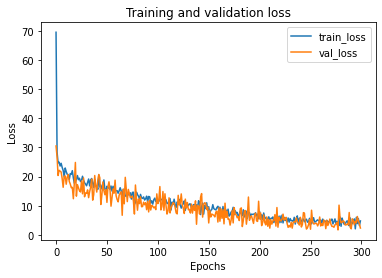

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)

plt.legend(['train_loss', 'val_loss'])

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

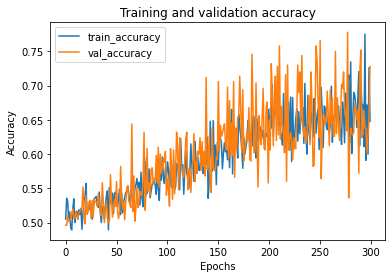

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.legend(['train_accuracy', 'val_accuracy'])

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

14/14 [==============================] - 0s 2ms/step - loss: 2.2593 - accuracy: 0.7290
0.7289719581604004
